In [98]:
import numpy as np
from matplotlib import pyplot as plt
import random
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [99]:
df=pd.read_csv("balance-scale data.csv")
df.head()

,leftW,leftD,rightw,rightD,class
0,1,1,1,1,B
1,1,1,1,2,R
2,1,1,1,3,R
3,1,1,1,4,R
4,1,1,1,5,R


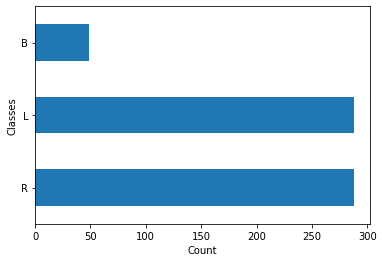

(625, 4)
[3 2 4 4]
(157, 4)
[-1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1]
[3 2 4 4]


In [100]:
x=df.iloc[:,[0,1,2,3]].values
Y=df["class"]
my_dict = {'B': 1, 'R': 1, 'L': -1}
Y = [my_dict[zi] for zi in Y]
len(x)
df['class'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()
print(np.shape(x))
X_train, X_test, y_train, y_test = train_test_split(x, Y)
print(X_train[1])
print(np.shape(X_test))
print(y_test)
print(X_train[1])

In [101]:
s=0
s+=2
print(s)
#X_train, X_test, Y_train, Y_test = train_test_split(x,Y, test_size = 0.1, stratify = Y, random_state = 1)


2


In [102]:
x=X_train
Y=y_train

threshold=0
learning_rate=1
epoch=2
def Activation(o):
    if o<0:
        return(-1)
    if o>=0:
        return(1)


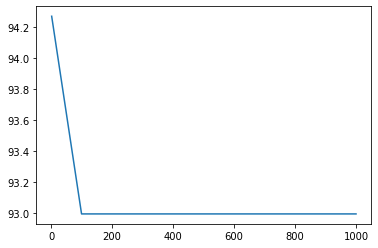

In [104]:
Accuracy=[]
e=[2,100,150,500,1000]
for epoch in e:
    a=np.zeros(len(x))
    w=np.zeros(4)
    b=0
    for k in range(1,epoch):
        for i in range(len(x)):
            sum=0
            a[i]=Activation(np.sum((x[i]*w))+b)
            if (Y[i]*a[i])<=0:
                w=w+(0.5*np.multiply(Y[i],x[i]))
                b=b+Y[i]
                a[i]=Activation(np.sum(x[i]*w)+b)    

    #print(a==Y)
    x_t=X_test
    Y_prd=np.zeros(len(y_test))
    for l in range(len(X_test)):
        Y_prd[l]=Activation(np.sum((x_t[l]*w))+b)

    A=np.asarray(Y_prd==y_test)

    Efficiency=A.sum()/len(y_test)
    Accuracy.append(Efficiency*100)

plt.plot(e,Accuracy)
plt.show()

95.54140127388536


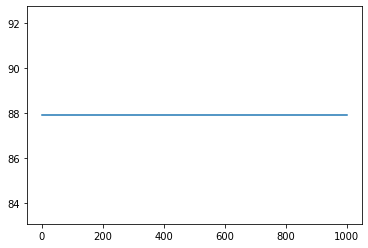

In [120]:
#Average perceptron

threshold=0
learning_rate=1
epoch=2
def Activation(o):
    if o<0:
        return(-1)
    if o>=0:
        return(1)
count_w=0
count_b=0

e_=[2,10,56,300,1000]
A_=[]
for epo in e_:
    for k in range(0,epo):
        a=np.zeros(len(x))
        w=np.zeros(4)
        w_i=[]
        w_c=[]
        b_i=[]
        b_c=[]
        b=0
        
        for i in range(len(x)):
            sum=0
            z=0
            count_w+=1
            count_b+=1

            a[i]=Activation(np.sum((x[i]*np.sum((w)+b))))
            if (Y[i]*a[i])<=0:
                w_c.append(count_w)
                b_c.append(count_w)
                w=w+(0.5*np.multiply(Y[i],x[i]))
                w_i.append(w)
                count_w=0
                b=b+Y[i]
                b_i.append(b)
                a[i]=Activation(np.sum((x[i]*np.sum((w))+b)))
                count_b=0

#print(a==Y)
#print(np.where(a!=Y))#print(y)
    x_t=X_test
    cw=np.zeros(4)
    cb=np.zeros(1)

    Y_prd=np.zeros(len(y_test))
    wp=np.asarray(w_i)
    wp_=np.asarray(w_c)
    bp=np.asarray(b_i)
    bp_=np.asarray(b_c)
    for h in range((len(wp))):
        cw+=bp[h]*bp_[h]
    for r in range((len(bp))):
        cb+=bp[r]*bp_[r]
    for l in range(len(X_test)):
        Y_prd[l]=Activation(np.sum((x_t[l]*w))+b)
    
    A=np.asarray(Y_prd==y_test)

    Efficiency=A.sum()/len(y_test)
    A_.append(Efficiency*100)
plt.plot(e_,A_)
plt.show()
